<a href="https://colab.research.google.com/github/mabushii68/AI_Class/blob/main/AAME_LSTM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 1.6 MB/s eta 0:00:00


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import FinanceDataReader as fdr

In [36]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AAME.csv")

In [37]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [38]:
# 컬렴명 확인
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [39]:
# 결측치 확인
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [40]:
df = df.drop('Adj Close', axis=1)
df = df.drop('Volume', axis=1)

In [41]:
X=df.drop('Open',axis=1)

X.head()

,Date,High,Low,Close
0,1980-03-17,4.05,3.85,3.85
1,1980-03-18,4.00,3.80,3.80
2,1980-03-19,4.05,3.85,3.85
3,1980-03-20,4.00,3.80,3.80
4,1980-03-21,3.95,3.75,3.75


In [42]:
y=df['Open']
y.value_counts()

,count
Open,
0.000000,1572
2.000000,296
2.125000,237
3.000000,220
1.875000,197
...,...
6.800000,1
3.046875,1
4.260000,1


In [43]:
samsung = fdr.DataReader('005930', '2020')
print(samsung)

             Open   High    Low  Close    Volume    Change
Date                                                      
2020-01-02  55500  56000  55000  55200  12993228 -0.010753
2020-01-03  56000  56600  54900  55500  15422255  0.005435
2020-01-06  54900  55600  54600  55500  10278951  0.000000
2020-01-07  55700  56400  55600  55800  10009778  0.005405
2020-01-08  56200  57400  55900  56800  23501171  0.017921
...           ...    ...    ...    ...       ...       ...
2025-05-21  56200  56600  55700  55700   7794181 -0.003578
2025-05-22  55300  55500  54500  54700  15254278 -0.017953
2025-05-23  55000  55200  54100  54200  11247115 -0.009141
2025-05-26  53900  55000  53700  54700  10901337  0.009225
2025-05-27  54200  54500  53800  53900  13347689 -0.014625

[1327 rows x 6 columns]


In [44]:
openValues = samsung[['Open']]

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(openValues)

In [46]:
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [47]:
def make_sample(data, window):
  train = []
  target = []
  for i in range(len(data) - window):
    train.append(data[i:i+window])
    target.append(data[i+window])
  return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()

model.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
)
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - loss: 0.1075
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0034
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0023
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0020
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0018
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016
Epoch 9/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0017
Epoch 10/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0016
Epoch 11/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0014
Epoch 12/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0013
Epoch 13/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 14/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0012
Epoch 15/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - l

In [50]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


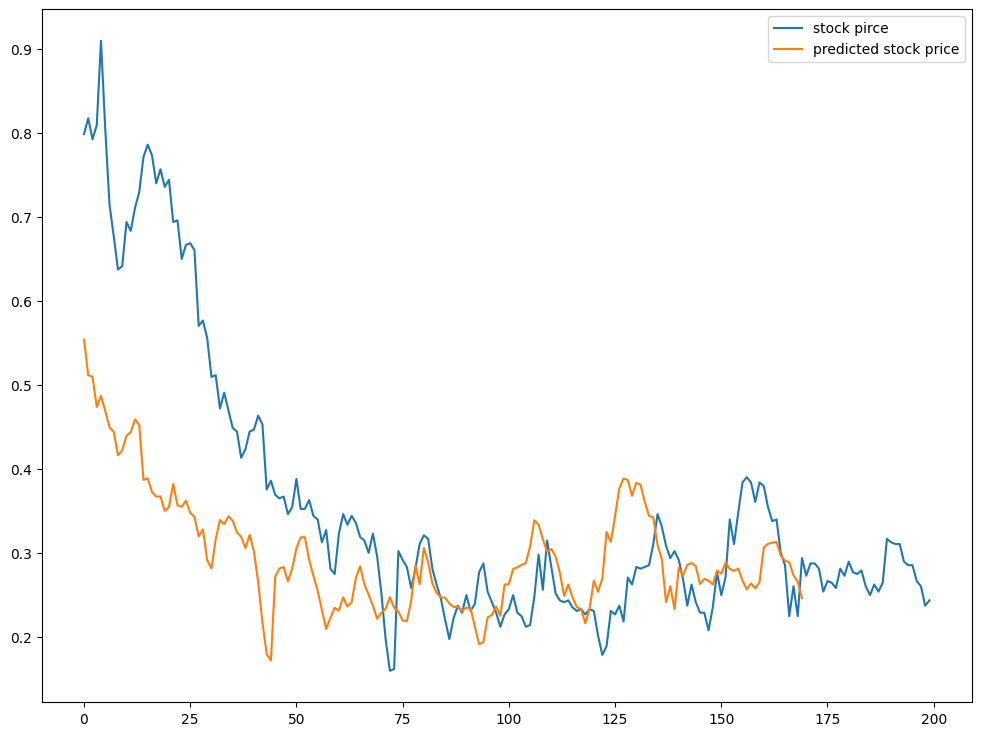

In [51]:
plt.figure(figsize=(12, 9))
plt.plot(test_data, label='stock pirce')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show ()